In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [2]:
np.random.seed(7)
iterations = 10000

In [3]:
target_name = "XYZ Company (EV/EBITDA Valuation)"
currency = "$"

# Historical or current EBITDA for the target (in millions)
current_ebitda = 8.0

# Expected growth or range for EBITDA
ebitda_growth_mean = 0.05
ebitda_growth_std = 0.02

# Net debt (or net cash if negative) for the target (in millions)
net_debt = 5.0

# Number of shares (for optional per-share valuation)
num_shares = 10.0  # in millions

# Comparable company multiples (EV/EBITDA)
comparable_multiples = [7.5, 8.2, 9.0, 8.8, 7.8]

multiple_mean = np.mean(comparable_multiples)  # average of comps
multiple_std = np.std(comparable_multiples)    # standard deviation of comps

In [4]:
def run_ev_ebitda_sim(
    iterations,
    current_ebitda,
    ebitda_growth_mean,
    ebitda_growth_std,
    multiple_mean,
    multiple_std
):

    # 1. Generate random growth factors for EBITDA
    growth_factors = np.random.normal(ebitda_growth_mean, ebitda_growth_std, iterations)

    # 2. Compute next-period EBITDA from the random growth draws
    #    EBITDA_next = current_ebitda * (1 + random growth)
    ebitda_next = current_ebitda * (1 + growth_factors)

    # 3. Generate random EV/EBITDA multiples
    multiples = np.random.normal(multiple_mean, multiple_std, iterations)

    # 4. Calculate enterprise value from each scenario
    #    EV = EBITDA_next * EV/EBITDA
    ev_scenarios = ebitda_next * multiples

    return ev_scenarios

In [5]:
ev_sims = run_ev_ebitda_sim(
    iterations=iterations,
    current_ebitda=current_ebitda,
    ebitda_growth_mean=ebitda_growth_mean,
    ebitda_growth_std=ebitda_growth_std,
    multiple_mean=multiple_mean,
    multiple_std=multiple_std
)

In [6]:
# Equity Value = EV - Net Debt
equity_sims = ev_sims - net_debt

# For optional per-share value
equity_per_share_sims = equity_sims / num_shares

In [7]:
# Summary Statistics
ev_mean = np.mean(ev_sims)
ev_median = np.median(ev_sims)
ev_std = np.std(ev_sims)
ev_min = np.min(ev_sims)
ev_max = np.max(ev_sims)
ev_5th = np.percentile(ev_sims, 5)
ev_95th = np.percentile(ev_sims, 95)

equity_mean = np.mean(equity_sims)
equity_median = np.median(equity_sims)
equity_5th = np.percentile(equity_sims, 5)
equity_95th = np.percentile(equity_sims, 95)

equity_ps_mean = np.mean(equity_per_share_sims)
equity_ps_median = np.median(equity_per_share_sims)

# Confidence intervals (68% ~ 1 std dev, 95% ~ 2 std dev)
ev_lower68 = ev_mean - ev_std
ev_upper68 = ev_mean + ev_std
ev_lower95 = ev_mean - 2 * ev_std
ev_upper95 = ev_mean + 2 * ev_std

In [8]:
summary_data = {
    "Metric": ["Mean", "Median", "Std Dev", "Min", "Max", "5th Percentile", "95th Percentile"],
    "Enterprise Value": [ev_mean, ev_median, ev_std, ev_min, ev_max, ev_5th, ev_95th],
    "Equity Value": [equity_mean, equity_median, np.std(equity_sims),
                     np.min(equity_sims), np.max(equity_sims),
                     equity_5th, equity_95th]
}
summary_df = pd.DataFrame(summary_data)
print("EV/EBITDA Valuation Summary:")
print(summary_df)

EV/EBITDA Valuation Summary:
            Metric  Enterprise Value  Equity Value
0             Mean         69.336275     64.336275
1           Median         69.376145     64.376145
2          Std Dev          4.899070      4.899070
3              Min         51.511583     46.511583
4              Max         86.447402     81.447402
5   5th Percentile         61.356972     56.356972
6  95th Percentile         77.367319     72.367319


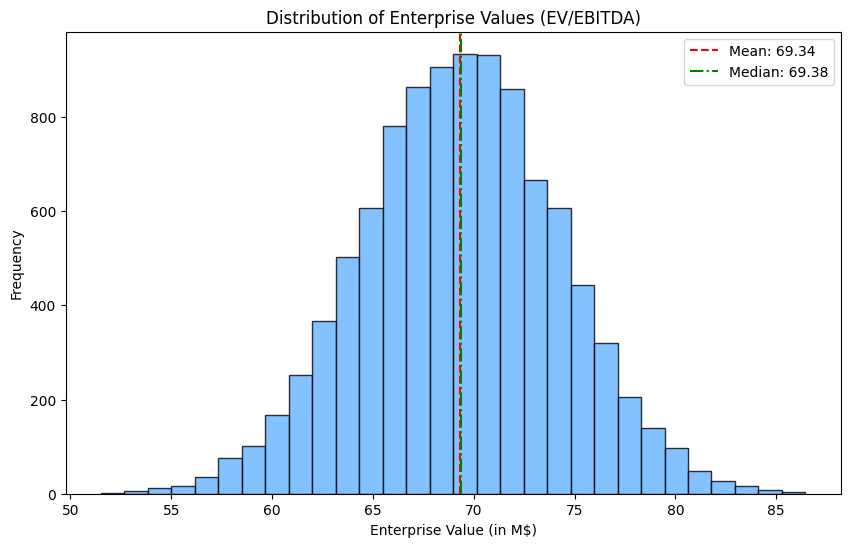

In [10]:
# Histogram for Enterprise Value
plt.figure(figsize=(10,6))
plt.hist(ev_sims, bins=30, color='#66B2FF', edgecolor='black', alpha=0.8)
plt.title("Distribution of Enterprise Values (EV/EBITDA)")
plt.xlabel(f"Enterprise Value (in M{currency})")
plt.ylabel("Frequency")
plt.axvline(ev_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {ev_mean:.2f}")
plt.axvline(ev_median, color='green', linestyle='dashdot', linewidth=1.5, label=f"Median: {ev_median:.2f}")
plt.legend()
plt.show()

In [11]:
# Detailed Report
print(f"\n# *** {target_name} - EV/EBITDA Monte Carlo Simulation ***")
print(f"Number of Iterations: {iterations:,d}")
print("\n## Key Assumptions:")
print(f"Current EBITDA: M{currency} {current_ebitda}")
print(f"EBITDA Growth: {ebitda_growth_mean*100:.1f}% (Std: {ebitda_growth_std*100:.1f}%)")
print(f"Comparables EV/EBITDA: {comparable_multiples}")
print(f"Avg Multiple: {multiple_mean:.2f}, Std Dev: {multiple_std:.2f}")
print(f"Net Debt: M{currency} {net_debt}")
print(f"Shares: {num_shares:.2f} million\n")

print("## Enterprise Value Outcomes:")
print(f"Mean: M{currency} {ev_mean:.2f}")
print(f"Median: M{currency} {ev_median:.2f}")
print(f"5th Percentile: M{currency} {ev_5th:.2f}, 95th Percentile: M{currency} {ev_95th:.2f}")
print(f"68% CI: M{currency} {ev_lower68:.2f} - M{currency} {ev_upper68:.2f}")
print(f"95% CI: M{currency} {ev_lower95:.2f} - M{currency} {ev_upper95:.2f}")

print("\n## Equity Value Outcomes (EV - Net Debt):")
print(f"Mean: M{currency} {equity_mean:.2f}")
print(f"Median: M{currency} {equity_median:.2f}")
print(f"Equity Value per Share (Mean): {currency} {equity_ps_mean:.2f}")
print(f"Equity Value per Share (Median): {currency} {equity_ps_median:.2f}")


# *** XYZ Company (EV/EBITDA Valuation) - EV/EBITDA Monte Carlo Simulation ***
Number of Iterations: 10,000

## Key Assumptions:
Current EBITDA: M$ 8.0
EBITDA Growth: 5.0% (Std: 2.0%)
Comparables EV/EBITDA: [7.5, 8.2, 9.0, 8.8, 7.8]
Avg Multiple: 8.26, Std Dev: 0.57
Net Debt: M$ 5.0
Shares: 10.00 million

## Enterprise Value Outcomes:
Mean: M$ 69.34
Median: M$ 69.38
5th Percentile: M$ 61.36, 95th Percentile: M$ 77.37
68% CI: M$ 64.44 - M$ 74.24
95% CI: M$ 59.54 - M$ 79.13

## Equity Value Outcomes (EV - Net Debt):
Mean: M$ 64.34
Median: M$ 64.38
Equity Value per Share (Mean): $ 6.43
Equity Value per Share (Median): $ 6.44
